## 第29章 動量交易策略

### 29.1 動量概念介紹

動量交易策略的英文名稱是 Momentum Trading Strategy。在經典力學裡，動量（Momentum）指的是物體的質量和速度的乘積。牛蝢當初在創造動量這個概念時，意圖捕捉的是「運動的量」這個概念。我們可以理解為物體必須有運動，才會有動量。背後的直覺是：當物體有運動，就會有速度；速度加上物體本身的質量，就決定了動量。速度和質量，一方面描述了物體的運動狀態，另一方面也同時刻畫其保持已有運動狀態的趨勢，即慣性大小。

類比於證券市場上，如果我們把「證券的價格」類比成「運動中的物體」，證券價格的「上漲或者下跌」則是可以視為物體運動。依據慣性的原理，證券價格上漲，則其則具有繼續上漲的動能，也可以說證券價格保持著上漲的動量；同理.證券價格下跌，則其可能有繼續下跌的動量。投資者透過研究證券價格的動量來分析證券價格的變化趨勢，進而制定交易策略，獲取收益。在投資實踐中，動量交易已有了廣泛的應用，例如美國價值線排名。在學術研究上，早在 1993 年，Jegadeesh 與 Titman 研究時便發現股票資產組合的中期收益存在延續性，即中期價格具有向某一方向連續變動的動量效應。

### 29.2 動量效應產生原因

對於證券市場上動量效應的產生原因，傳統金融學與行為金融學有截然不同的看法。傳統金融學在保留期望效用與理性人假設的前提下，試圖引入更多的風險因子，期能產生新的風險溢酬來捕捉動量效應產生的超額收益。一般而言，這些嘗試並沒有獲得廣泛的認可，同時也存在是否過度擬合的疑慮。與傳統金融理論相悖，行為金融學則認為投資人在複雜的市場環境中無法完美地預期與判斷，故有「非理性亅的行為與隨之而來的定價偏差；同時，套利者受限於市場機制與風險承擔能力，也不一定能及時糾正偏差的價格。不過，真正的原因何在，說法卻不一而足。較為人所熟知的，有「反應不足」，「正反饋模式」，和「過度反應」等見解。

我們從底下的說明可以簡要地理解「反應不足」的思想。舉例來說，當上巿公司出現利好訊息時，其證券價格會隨之上漲，但由於投資者沒能及時地接收、消化這一訊息，價格對此訊息的反應無法一步到位。如蘋果公司發佈其年中財報，財報顯示蘋果公司運營很好。投資者 A 可能是在財報發佈當下即購買蘋果股票，投資者 B 在五天後才看到這個財報，其又觀望了一天，然後再去購買蘋果股票。對於蘋果的股價來說、這個利好訊息本身應導致蘋果股價上漲；市場上 A 類的投資者，會使蘋果股價在財報發佈的當下反應；但由於市場上還有很多訊息反應不足的 B 類投資者，蘋果股價上漲會持續一段時問，因而產生蘋果股價的動量效應。

另一種說法，「正反饋模式」，藉由羊群效應來說明動量產生的原因。當多數投資人有從眾心理，認知或判斷傾向於公眾輿論或行為，證券市場即有「贏者恆贏，輸者恆輸亅的現象。

第三種說法「過度反應」是指投資人對私有訊息的預測性、自身的投資判斷能力等高估而產生的過度反應。更甚者，當短期的趨勢變化「不出所料」，這個心理、行為現象會被進一步強化。

上述三種行為金融的理論除了解釋的角度有所差異、其預測的現象也不盡然相同。反應不足」預測動量效應只存在於短期，會隨著時間的延長而逐漸消失。「正反饋慔式」與「過度反應」則認為動量為短期偏離基本價值的泡沫，當泡沫隨著時間長而有朝一日破裂時，股價便會反轉。

### 29.3 價格動量的計算公式

#### 29.3.1 作差法求動量值

第一種計算方式是作差法，即今天的價格減去一段時問問隔（$m$期）以前的價格，用公式表示 $t$ 時期的期動量 $\mbox{Momentum}_t$為：

$$\mbox{Momentum}_t=P_t-P_{t-m}$$

其中，$P_t$ 為股票 $t$ 時期的價格，$m$ 表示時間間隔，$P_{t-m}$ 為股票在 $t-m$ 期的價格。

###### Example. 
以鴻海股票為例，運用作差法來計算出鴻海股票的收盤價的 5 期動量值。

1. 先獲取鴻海股票數據，提取收盤價 Close 數據，定義滯後 5 期收盤價的變數 lag5Close，進行作差。

In [1]:
# 滙入相關套件
import pandas as pd
import matplotlib.pyplot as plt
# 獲取鴻海股票日度數據
Foxconn=pd.read_csv('.\\PythonBook_code_data\\part5\\29\\2317.csv',sep='\t')
Foxconn.index=pd.to_datetime(Foxconn.Date,format='%Y-%m-%d')
Foxconn.head(2)

,Date,Close,Open,High,Low,Volume
Date,,,,,,
2015-06-01,2015-06-01,77.0,78.43,78.43,77.00,36037
2015-06-02,2015-06-02,77.4,76.76,77.79,76.53,35901


In [2]:
# 提取收盤價
Close=Foxconn.Close
Close.describe()

count    393.000000
mean      73.863435
std        5.248808
min       62.970000
25%       70.120000
50%       73.470000
75%       77.000000
max       85.700000
Name: Close, dtype: float64

In [3]:
# 求滯後 5 期的收盤價
lag5Close=Close.shift(5)
# 求 5 日動量
momentum5=Close-lag5Close
momentum5.tail()

Date
2016-12-26    0.5
2016-12-27   -0.2
2016-12-28    0.7
2016-12-29    0.8
2016-12-30    1.5
Name: Close, dtype: float64

2. 繪製 2016 年 8 月 1 日到 12 月 30 日鴻海收盤價曲線圖和 5 日動量曲線圖。

Text(0, 0.5, 'Momentum5')

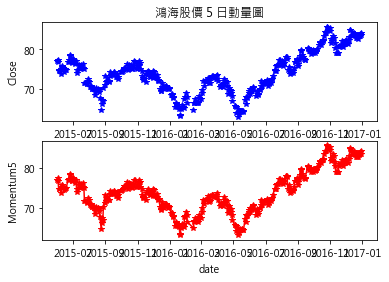

In [6]:
# 繪製收盤價和 5 日動量曲線圖
#plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.subplot(211)
plt.plot(Close,'b*')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('鴻海股價 5 日動量圖')
plt.subplot(212)
plt.plot(Close,'r-*')
plt.xlabel('date')
plt.ylabel('Momentum5')

圖形如圖29.1所示。

圖29.1：鴻海股票收盤價與5日動量圖

#### 29.3.2 作除法求動量值

動量的另一種計算方式是作除法，即 $t$ 期的價格 $P_t$ 減去其 $m$ 期以前的價格 $P_{t-m}$，再除以 $P_{t_m}$。做除法求出的動量值衡量的是價格變化的比率，用公式表示 $t$ 時期的ROC（Rate of Change）為：

$$\mbox{ROC}_t=\frac{P_{t}-P_{t-m}}{P_{t-m}}$$

其中，$\mbox{ROC}_t$ 表示股票 $t$ 時期的 $m$ 期動量值（價格變化率），$P_t$ 表示股票 $t$ 時期的價格，$m$ 表示時間間隔，$P_{t-m}$ 表示股票在 $t-m$ 期的價格。

對於時間間隔 $m$ 的單位，有天、周、月或者年等。在投資實踐和金融研究中，較為常用的時間跨度有 1 個月、3 個月、6 個月、9 個月或者 12 個月。以 10 天、20 天、25 天為時間間隔的動量一般被看作短期動量，6 個月、9 個月為時間跨度的動量常常用於中期動量，而長期動量的時間間隔常達 1 年或者更久。

###### Example.
以鴻海股票為例，運用做除法來計算鴻海股票日度收盤價的 5 日動量值。

In [8]:
# 作除法，求鴻海股票的5日動量值
Momen5=Close/lag5Close-1
Momen5=Momen5.dropna()
Momen5[:5]

Date
2015-06-08   -0.024675
2015-06-09   -0.047028
2015-06-10   -0.014330
2015-06-11    0.013774
2015-06-12    0.007370
Name: Close, dtype: float64

### 29.4 撰寫動量函數 momentum()

動量值一般採用作差法求得，為了計算動量值方便，此處撰寫一個簡單的動量函數 momentum()，該函數有價格 price 和期數 period 兩個參數，函數定義如下：

In [9]:
def momentum(price,period):
    lagPrice=price.shift(period)
    momen=price-lagPrice
    momen=momen.dropna()
    return(momen)

透過呼叫 momentum() 函數即可求動量值。

In [10]:
momentum(Close,5).tail(n=5)

Date
2016-12-26    0.5
2016-12-27   -0.2
2016-12-28    0.7
2016-12-29    0.8
2016-12-30    1.5
Name: Close, dtype: float64

### 29.5.1 鴻海股票 2016 年走勢及 35 日動量線

為了直觀瞭解動量指標的涵義以及具體用法，以中期動量值 35 日動量為例，在圖 29.2 中繪製出鴻海股票 2015 年的蠟燭圖以及 35 日動量線。

In [11]:
# 計算35日動量值
momen35=momentum(Close,35)

在繪製Ｋ線圖上，在前面章節中有定義 candlePlot() 函數，但是此函數不能增加子圖。下面，我們對 candlePlot() 函數進行修改和補充，再定義一個新的函數 candleLinePlots()，該函數返回的圖形中包含兩個子圖，第一個子圖為蠟燭圖，第二個子圖為線形圖。在定義函數時，使用了不定長參數 **kwargs。函數定義如下：

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,\
                                DayLocator, MONDAY, date2num
from matplotlib.finance import candlestick_ohlc
#plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

# 定義 candleLinePlots() 函數
def candleLinePlots(candleData, candleTitle='a', **kwargs):
    Date = [date2num(date) for date in candleData.index]
    candleData.loc[:,'Date'] = Date
    listData = []
    for i in range(len(candleData)):
        a = [candleData.Date[i],\
            candleData.Open[i],candleData.High[i],\
            candleData.Low[i],candleData.Close[i]]
    listData.append(a)
    # 如果不定長參數無取值，只畫蠟燭圖
    ax = plt.subplot()

    # 如果不定長參數有值，則分成兩個子圖
    flag=0
    if kwargs:
        if kwargs['splitFigures']:
            ax = plt.subplot(211)
            ax2= plt.subplot(212)
            flag=1;
        # 如果無參數 splitFigures，則只畫一個圖形框
        # 如果有參數 splitFigures，則畫出兩個圖形框
        for key in kwargs:
            if key=='title':
                ax2.set_title(kwargs[key])
            if key=='ylabel':
                ax2.set_ylabel(kwargs[key])
            if key=='grid':
                ax2.grid(kwargs[key])
            if key=='Data':
                plt.sca(ax)
                if flag:
                    plt.sca(ax2)
                # 一維數據
                if kwargs[key].ndim==1:
                    plt.plot(kwargs[key],\
                             color='k',\
                             label=kwargs[key].name)
                    plt.legend(loc='best')
                # 二維數據有兩個columns
                elif all([kwargs[key].ndim==2,\
                          len(kwargs[key].columns)==2]):
                    plt.plot(kwargs[key].iloc[:,0], color='k',\
                             label=kwargs[key].iloc[:,0].name)
                    plt.plot(kwargs[key].iloc[:,1],\
                             linestyle='dashed',\
                             label=kwargs[key].iloc[:,1].name)
                    plt.legend(loc='best')

    mondays = WeekdayLocator(MONDAY)
    weekFormatter = DateFormatter('%y %b %d')
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(DayLocator())
    ax.xaxis.set_major_formatter(weekFormatter)
    plt.sca(ax)

    candlestick_ohlc(ax.listData, width=0.7,\
                     colorup='r',colordown='g')
    ax.set_title(candleTitle)
    plt.setp(ax.get_xticklabels(),\
             rotation=20,\
             horizontalalignment='center')
    ax.autoscale_view()

    return(plt.show())

ModuleNotFoundError: No module named 'matplotlib.finance'

圖 29.2：鴻海股票2015年的蠟燭圖以及35日動量線

觀察圖 29.2 所示鴻海收盤價格曲線和 35 動量線，可以看出動量線在 0 值下方時，鴻海股票價格大致處於下跌趨勢。當動量線在 0 值以上時，股票價格走勢整體處於上升趨勢。此外，動量線的走勢和蠟燭線的價格走勢方向大致類似，但動量線變化的趨勢可能會比蠟燭圖的走勢提前。

為了方便呼叫此 candleLinePlots() 函數，我們將 candleLinePlots() 放置到之前建立的 candle 模組中，透過 import candle 模組來呼叫此函數。

In [14]:
import candle
Foxconn15=Foxconn['2015']
candle.candleLinePlots(Foxconn15,\
               candleTitle='鴻海股票2015年日Ｋ線圖',\
               splitFigures=True,Data=momen35['2015'],\
               title='35日動量',ylabel='35日動量')

ModuleNotFoundError: No module named 'candle'

### 29.6 動量交易策略的一般思路

運用動量指標制定交易策略，常用的交易策略可以總結為下面的四個步驟：

1. 獲取股票價格（一般為收盤價）數據；

2. 確定時間跨度和動量表達式，計算股票的動量值；

3. 根據動量指標制定交易策略；

   動量大於 0，股票可能還具備上漲的能量，釋放出買入的信號；當股票的動量值小於 0，股票可能有下跌的能量，釋放出賣出信號。簡而言之，若動量大於 0，則買入股票；若動量小於 0，則賣出股票。

4. 交易策略的回測與評價。

#### 29.6.1 運用動量指標交易鴻海股票

結合動量指標的交易思想，用 Python 撰寫程式碼來捕捉市場中的可能買賣點。從動量的計算公式可以看出，動量值的大小與時間跨度 $m$ 有很大的關係，在時問跨度 $m$ 的設定上，見仁見智，沒有統一標準。在本次的動量指標計算中，將時間跨度設定為 35 日，根據 35 日動量的取值情況來捕捉買賣點。

* 當 35 日動量為正值時，市場可能還存在上升的能量，我們推斷第 2 期可以進行買入操作；

* 當 35 日動量為負值時，我們預期未來價格可能要下跌，第 2 期可以進行賣出操作。

還請注意，在投資實戰中，投資者會綜合多種指標和形態來確定買入點和賣出點。為了著重體現動量指標的交易思想，這裡假定買賣操作的確定只依據動量這一個指標。

1. 首先提取出鴻海股票的收盤價數據，計算 35 日動量值。

In [15]:
Close=Foxconn.Close
momen35=momentum(Close,35)
momen35.head()

Date
2015-07-22   -1.98
2015-07-23   -5.78
2015-07-24   -5.14
2015-07-27   -3.48
2015-07-28   -3.41
Name: Close, dtype: float64

2. 結合 35 日動量值的取值情況來判斷買賣點，35 日動量釋放的買賣點信號用 signal 表示

In [18]:
# 當35日動量值為負值時,signal取值為-1,表示賣出；
# 當35日動量值為非負值時,signal取值為1,表示買入；
signal=[1 if momen35Value>0 else -1 for momen35Value in momen35]
signal=pd.Series(signal,index=momen35.index)
signal.head()

Date
2015-07-22   -1
2015-07-23   -1
2015-07-24   -1
2015-07-27   -1
2015-07-28   -1
dtype: int64

3. 根據買賣點制定買入和賣出交易，並計算收益率。

In [19]:
tradeSig = signal.shift(1)
ret=Close/Close.shift(1)-1
Mom35Ret=(ret*(signal.shift(1))).dropna()
Mom35Ret[:5]

Date
2015-07-23    0.045321
2015-07-24   -0.000000
2015-07-27    0.004468
2015-07-28    0.001122
2015-07-29   -0.016709
dtype: float64

4. 35日動量指標交易策略評價

35 日動量指標交易策略確捕捉到買賣點信號以後，計算該 35 日動量指標買賣點預測的準確率。當出現買入信號時，signal 取值為 1，當我們預計的價格上漲這件事發生了（也就是預測準確，收益率大於 0），則 signal 與 ret 的乘積大於 0。當出現賣出信號時，signal 取值為 -1 且預測準確時，收益率小於 0，signal（取值為 -1）與 ret（負值）的乘積也是大於 0。當 35 日動量值交易的收益率大於 0，則說明買賣點預測正確。

In [20]:
# 計算指標交易獲勝率
win=Mom35Ret[Mom35Ret>0]
winrate=len(win)/len(Mom35Ret)
winrate

0.5210084033613446

繪製鴻海股票收益率與動量指標交易策略收益率的時序圖，查詢收益率的分佈情況。

d:\mydoc\!prog\python\portablepython3.6.5x64r2\app\python\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\mydoc\!prog\python\portablepython3.6.5x64r2\app\python\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


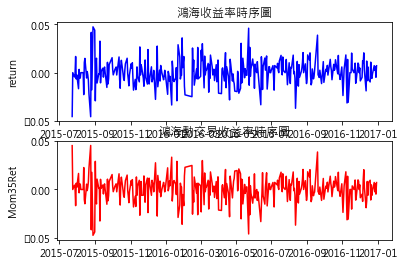

In [21]:
# 繪製收益率時序圖
plt.subplot(2,1,1)
plt.plot(ret[Mom35Ret.index],'b')
plt.ylabel('return')
plt.title('鴻海收益率時序圖')

plt.subplot(2,1,2)
plt.plot(Mom35Ret,'r')
plt.ylabel('Mom35Ret')
plt.title('鴻海動交易收益率時序圖')
plt.show()

圖29.3：收益率畤序圖

提取 35 日動量指標預測正確時的收益率與預測失敗時的收益率，併進行比較分析。

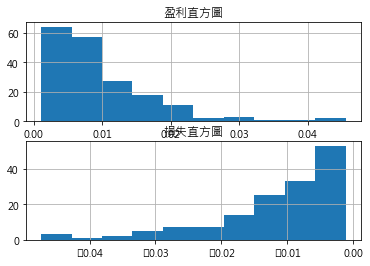

In [22]:
loss=Mom35Ret[Mom35Ret<0]
plt.subplot(2,1,1)
win.hist()
plt.title("盈利直方圖")
plt.subplot(2,1,2)
loss.hist()
plt.title("損失直方圖")
plt.show()

圖29.4：盈利與損失收益率的直方圖

接著，計算兩種收益率的平均值與分位數值。

In [23]:
performance=pd.DataFrame({"win":win.describe(),"loss":loss.describe()})
performance

,win,loss
count,186.000000,150.000000
mean,0.009804,-0.011285
std,0.007847,0.010117
min,0.001111,-0.047349
25%,0.003886,-0.015208
50%,0.008264,-0.007807
75%,0.012961,-0.003754
max,0.045522,-0.001146


從兩種收益率的分位數分佈情況可以看出，儘管鴻海股票 35 日動量指標交易策略預測凖確率高於 0.5，動量指標預測錯誤時損失的平均收益率比預測準確時盈利的收益率大。從標準差來看，預測準確時的收益率更集中。